# Unit #2: Prior information

The goal of this assignment is to (1) utilize different priors to conduct Bayesian inference in R.

## Problem #1: Probability of a genetic marker

Suppose researchers would like to know the probability, $p$, that an individual in a given population has a genetic marker that predisposes them for disease $D$ (this genetic marker is such that an individual has it or doesn’t; assume that our test for the marker is completely accurate). Researchers collected data in the following way: they tested people for this genetic marker until they found one person who had it. They stopped data collection at that point. Here’s the data: $\mathbf{x} = (0,0,0,0,1)$. Suppose your prior beliefs are best represented by a beta$(2,2)$ distribution. What is the posterior distribution for $p \, | \, \mathbf{x}$?

The prior mean is  0.5

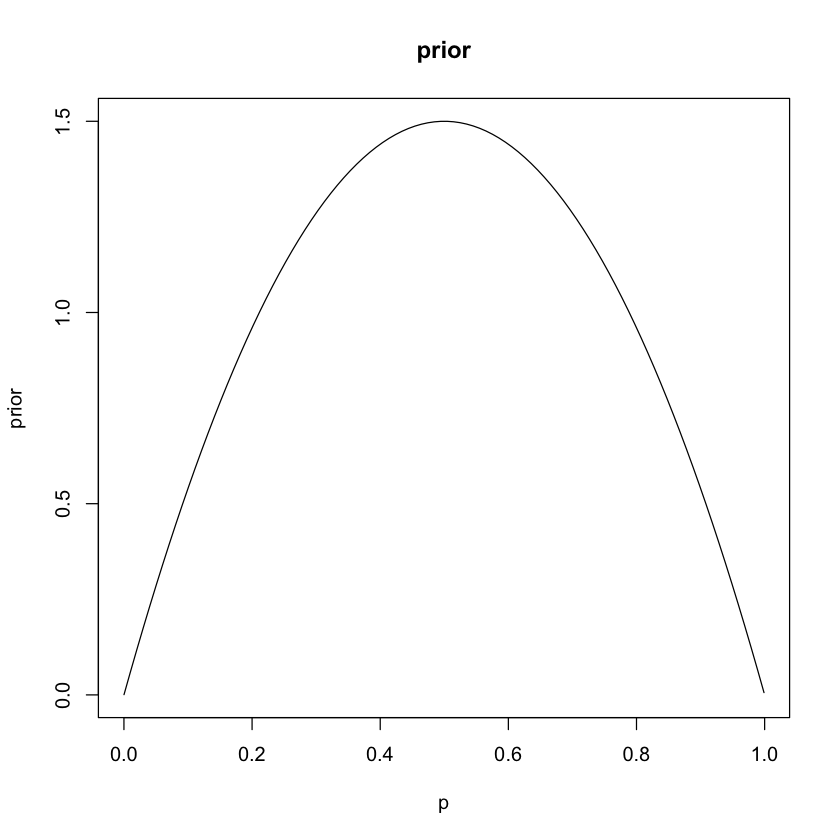

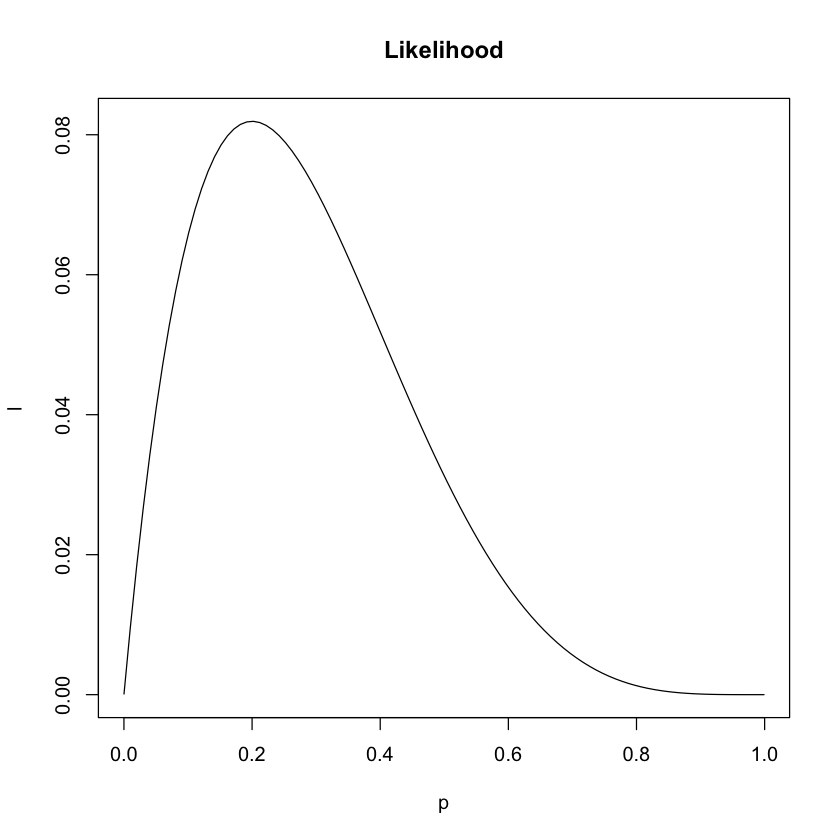

In [20]:
#prior 
p = seq(0.0001,0.999,length.out = 100); 
alpha = 2; beta = 2
prior = dbeta(p,alpha,beta)
plot(p,prior, type = "l", main = "prior")
cat("The prior mean is ", alpha/(alpha + beta))

#likelihood 
x = c(0,0,0,0,1) #data
y = 4; # # of failures
l = dgeom(y,p)
plot(p,l,type = "l", main = "Likelihood")


The posterior mean is  0.3333333

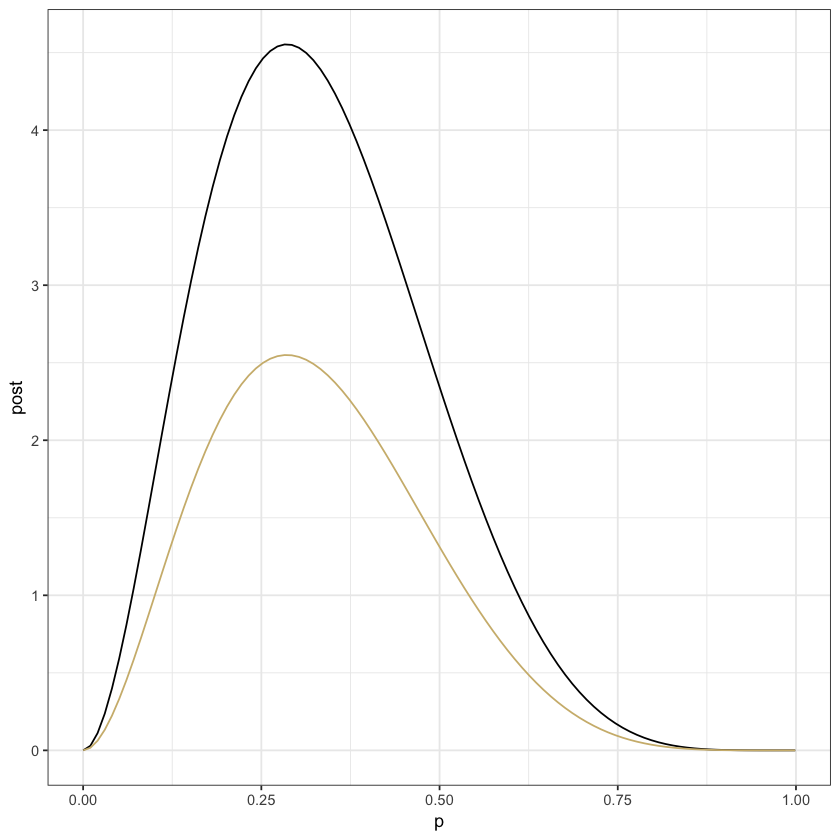

In [17]:
#posterior
post = prior*l
posterior = dbeta(p,alpha +1, y + beta)
cat("The posterior mean is ", (alpha+1)/(alpha+1 + y+ beta))


library(ggplot2)
df = data.frame(p = p, post = 50*post, posterior = posterior)
#sum(28*post-posterior)
ggplot(df) + 
    geom_line(aes(x = p, y = post)) + 
    geom_line(aes(x = p, y = posterior), col = "#CFB87C") + 
    theme_bw()


What is a $95\%$ credible interval for $p \, | \, \mathbf{x}$?

In [3]:
#95% credible interval
level = 0.95
c(qbeta((1-0.95)/2, alpha +1, y + beta), qbeta(1-(1-0.95)/2,alpha +1, y + beta))

#pbeta(0.650855794412824,alpha +1, y + beta)- pbeta(0.0852334141372536,alpha +1, y + beta)

[1] 0.08523341 0.65085579

After observing our data (and assuming our prior), the probability that $p$ is between $0.09$ and $0.65$ is approximately $0.95$. 

## Problem #2: Normal-inverse Gamma

An assembly line relies on accurate measurements from an image recognition algorithm at the first stage of the process. It is known that the algorithm is unbiased, so assume that measurements follow a normal distribution with mean zero: $Y_i \, | \, \sigma^2 \sim N(0,\sigma^2)$. Some errors are permissible, but if $\sigma$ exceeds the threshold $c$ then the algorithm must be replaced. You make $n = 20$ measurements and observe $\sum^n_{i=1}y_i = -2$ and $\sum^n_{i=1}y^2_i = 15$. 

**2 (a) Conduct a Bayesian inference with an inverse gamma prior on $\sigma^2$ with $a = b = 0.1$.**

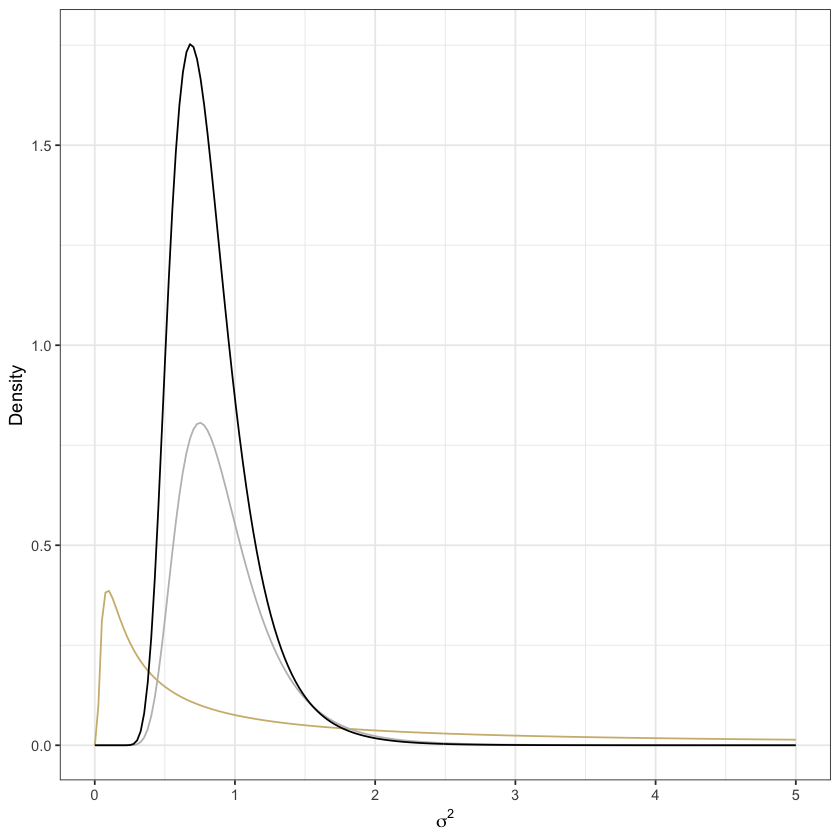

In [24]:
library(invgamma)
library(ggplot2)

sigma2_grid = seq(0.001, 5, length.out = 200)
a = 0.1; b = 0.1;
prior = dinvgamma(sigma2_grid,a,b)

n = 20; sse = 15
likelihood = function(sigma2,n,sse){
    l = 1000*(sigma2)^(-n/2)*exp(-sse/(2*sigma2))
    return(l)
}

l = likelihood(sigma2_grid, n, sse)

A = n/2+a; B = sse/2+b; posterior = dinvgamma(sigma2_grid,A,B)

df = data.frame(sigma2 = sigma2_grid, prior = prior, l = l, posterior = posterior)
ggplot(df) + 
    geom_line(aes(sigma2, prior), col = "#CFB87C")+
    geom_line(aes(sigma2, l), col = "gray")+
    geom_line(aes(sigma2, posterior), col = "black")+
    xlab(expression(sigma^2)) +
    ylab("Density") +
    theme_bw()

**2 (b) Compute the posterior probability that $\sigma^2 > c = 1$**

In [25]:
1 - pinvgamma(1,A,B)

[1] 0.2249838

## Problem #3 Improper priors

Let $X_1,...,X_n \overset{iid}{\sim}N(\mu, 1)$ and let $\pi(\mu) = 1/10$ for $\mu \in (-\infty, \infty)$. Clearly, $\int_{-\infty}^\infty\pi(\mu)d\mu > 1$, so $\pi(\mu)$ is improper. 

**3 (a) Show numerically that the posterior is proper.**

In [6]:
set.seed(99109)
library(ggplot2)

m = 10000; mu_grid = seq(-2,2,length.out = m)
n = 3; x = rnorm(n,0,1)
prior = 1/10;

l = function(mu){
    likelihood = 1
    for(i in 1:n){
        likelihood=likelihood*dnorm(x[i],mu,1)
    }
    return(likelihood)
    }

posterior = function(mu){
    p = l(mu)*prior/(prior*integrate(l,-Inf,Inf)$val)
    return(p)
}
#posterior(mu_grid)

integrate(posterior,-Inf,Inf)


1 with absolute error < 2.1e-06

       mu         prior           l               posterior        
 Min.   :-2   Min.   :0.1   Min.   :1.089e-07   Min.   :0.0000902  
 1st Qu.:-1   1st Qu.:0.1   1st Qu.:2.852e-05   1st Qu.:0.0236311  
 Median : 0   Median :0.1   Median :1.860e-04   Median :0.1541341  
 Mean   : 0   Mean   :0.1   Mean   :3.006e-04   Mean   :0.2491035  
 3rd Qu.: 1   3rd Qu.:0.1   3rd Qu.:5.730e-04   3rd Qu.:0.4748552  
 Max.   : 2   Max.   :0.1   Max.   :8.338e-04   Max.   :0.6909884  

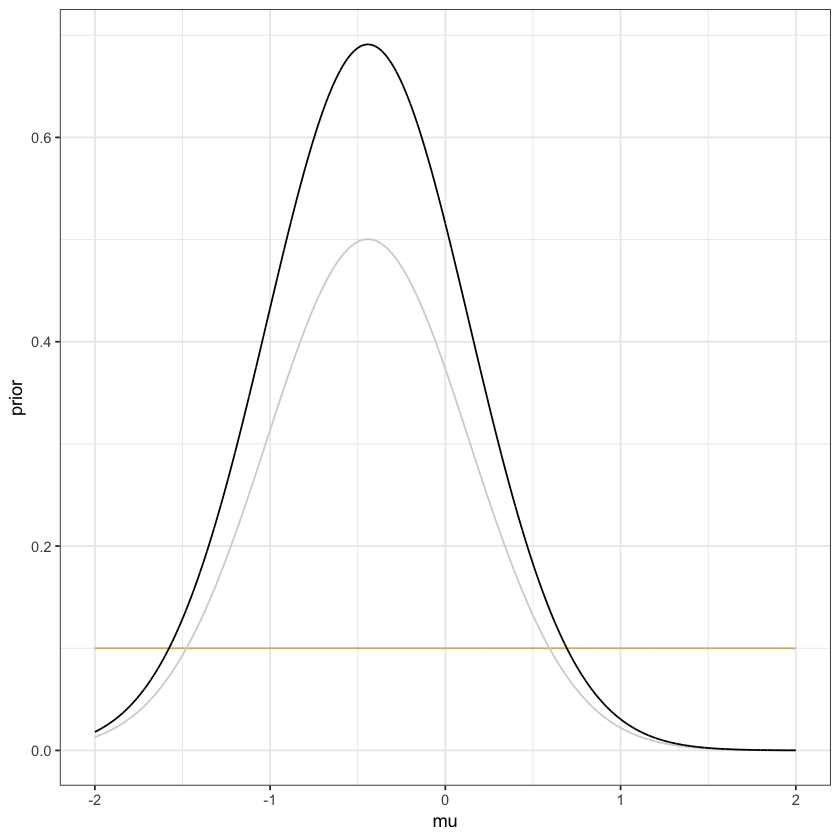

In [7]:
df = data.frame(mu = mu_grid, prior = rep(prior,m), l = l(mu_grid), posterior = posterior(mu_grid))
summary(df)
ggplot(df) + 
    geom_line(aes(x = mu, y = prior),col = "#CFB87C") + 
    geom_line(aes(x = mu, y = 600*l),col = "lightgray") +
    geom_line(aes(x = mu, y = posterior)) +
    theme_bw()

**3 (b) Provide numerical evidence that the maximizer of the posterior is equivalent to the MLE.**

In [8]:
which.max(l(mu_grid))
which.max(posterior(mu_grid))
mu_grid[which.max(l(mu_grid))]
mean(x)

[1] 3896

[1] 3896

[1] -0.4418442

[1] -0.4417933

## Problem #4

Let $Y \, | \, \lambda \sim Poisson(\lambda)$. 

**4 (a) Derive and plot the Jeffrey's prior for $\lambda$.**

Note that $f(y \, | \, \lambda) = \frac{e^{-\lambda}\lambda^y}{y!}$ which implies that $\log f(y \, | \, \lambda) = \log\left(\frac{e^{-\lambda}\lambda^y}{y!}\right)= \log\left(e^{-\lambda}\right)+\log\left(\lambda^y\right) - \log\left(y!\right)$ and $\frac{d^2\log f(y \, | \, \lambda)}{d\lambda^2} = \left(-1 + \frac{y}{\lambda}\right)' = - \frac{y}{\lambda^2}$. So

\begin{align*}
I(\lambda) = -E\left(\frac{d^2\log f(y \, | \, \lambda)}{d\lambda^2} \right) = -E\left(- \frac{y}{\lambda^2} \right) =  \frac{1}{\lambda}.
\end{align*}

Thus, the Jeffrey's prior is 
$$\pi(\lambda) \propto \sqrt{I(\lambda)} = \lambda^{-1/2}$$

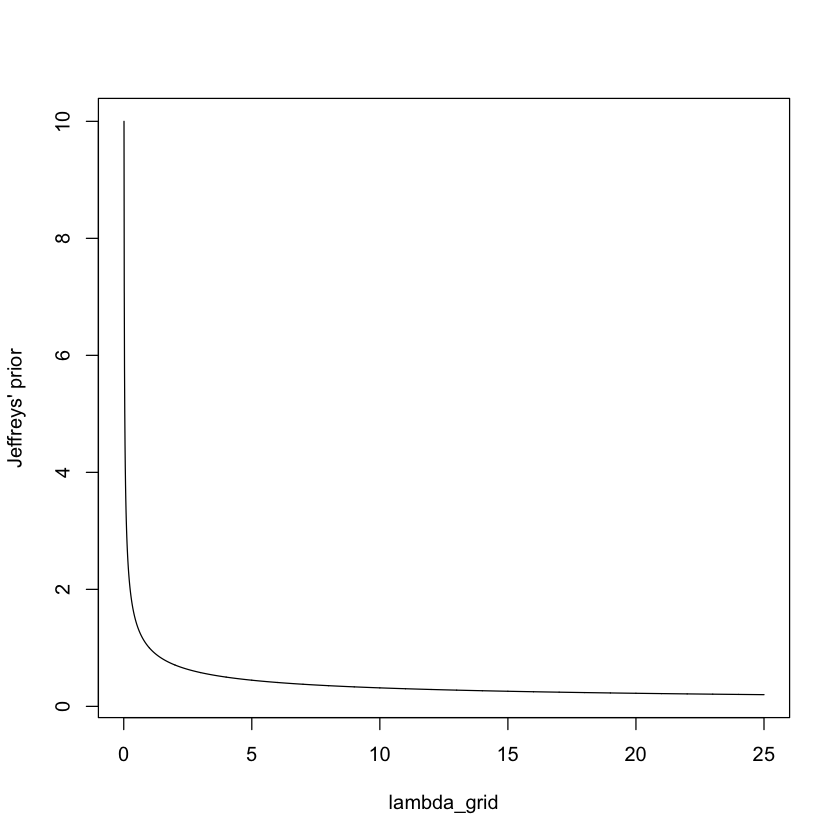

In [9]:
lambda_grid = seq(0.01,25,0.01)
prior = function(l){
    f = 1/sqrt(l)
    return(f)
    }
  plot(lambda_grid,prior(lambda_grid),type="l",ylab="Jeffreys' prior")

**4 (b) Is the prior proper?**

In [10]:
integrate(prior,0, Inf)
#nope!

ERROR: Error in integrate(prior, 0, Inf): the integral is probably divergent


**4 (c) Derive the posterior and give conditions on $Y$ to ensure it is proper.**

\begin{align*}
\pi(\lambda \, | \, y) \propto f(y \, | \, \lambda)\pi(\lambda) = \frac{e^{-\lambda}\lambda^{y-1/2}}{y!} \propto \lambda^{y-1/2}e^{-\lambda}
\end{align*}

Note that if $X\sim\Gamma(\alpha, \beta)$ then

\begin{align*}
f(x \, | \, \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha -1}e^{-\beta x}, \,\,\,\,\, y >0, \,\, \alpha > 0, \,\, \beta >0.
\end{align*}

This is the same form of our posterior with $x = \lambda$, $\alpha = y + 1/2$, and $\beta = 1$. This will always be a proper distribution.

**4 (d) Conduct an "objective" Bayesian analysis using the distribution above and $Y = 10$.**

In [ ]:
y = 10
posterior = dgamma(lambda_grid, y + 1/2,1)

df = data.frame(lambda = lambda_grid, prior = prior(lambda_grid), posterior = posterior)
ggplot(df) + 
    geom_line(aes(x = lambda, y = 1/100*prior),col = "#CFB87C") + 
    geom_line(aes(x = lambda, y = posterior)) +
    theme_bw()

lambda_grid[which.max(posterior)]


[1] 0.975